## Подготовка данных

### Импорты

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

### Загрузка данных

In [ ]:
od.download("https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gothmike
Your Kaggle Key: ··········


100%|██████████| 24.4k/24.4k [00:00<00:00, 22.0MB/s]


Extracting archive ./classification-of-oil-and-gas-fields/classification-of-oil-and-gas-fields.zip to ./classification-of-oil-and-gas-fields


In [ ]:
data = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")
data.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


<div style="text-align: center; font-size: 32px">Описание колонок</div>

<table><thead><tr class="rowsep-1"><th scope="col"><strong>Переменная</strong></th><th scope="col"><strong>Тип</strong></th><th scope="col"><strong>Описание</strong></th></tr></thead><tbody>


<tr><th scope="row"><em>Field name</em></th><td>object </td><td>название месторождения</td></tr>

<tr><th scope="row"><em>Reservoir unit</em></th><td>object </td><td>юнит месторождения</td></tr>

<tr><th scope="row"><em>Country</em></th><td>object </td><td>страна расположения</td></tr>

<tr><th scope="row"><em>Region </em></th><td>object </td><td>регион расположения</td></tr>

<tr><th scope="row"><em>Basin name</em></th><td>object </td><td>название бассейна пород</td></tr>

<tr><th scope="row"><em>Tectonic regime</em></th><td>object </td><td>тектонический режим</td></tr>

<tr><th scope="row"><em>Latitude</em></th><td>float </td><td>широта</td></tr>

<tr><th scope="row"><em>Longitude </em></th><td>float </td><td>долгота</td></tr>

<tr><th scope="row"><em>Operator company</em></th><td>object </td><td>название компании</td></tr>

<tr><th scope="row"><em>Onshore or oﬀshore</em></th><td>object </td><td>целевая переменная</td></tr>

<tr><th scope="row"><em>Hydrocarbon type (main)</em></th><td>object </td><td>тип углеводорода</td></tr>

<tr><th scope="row"><em>Reservoir status (current)</em></th><td>object </td><td>статус месторождения</td></tr>

<tr><th scope="row"><em>Structural setting</em></th><td>object </td><td> структурные свойства</td></tr>

<tr><th scope="row"><em>Depth (top reservoir ft TVD) </em></th><td>int </td><td> глубина</td></tr>

<tr><th scope="row"><em>Reservoir period </em></th><td>object </td><td> литологический период</td></tr>

<tr><th scope="row"><em>Lithology (main) </em></th><td>object </td><td>  литология</td></tr>

<tr><th scope="row"><em>Thickness (gross average ft)</em></th><td>float </td><td>  общая толщина</td></tr>

<tr><th scope="row"><em>Thickness (net pay average ft) </em></th><td>float </td><td> эффективная толщина</td></tr>

<tr><th scope="row"><em>Porosity (matrix average)  </em></th><td>float </td><td> Пористость</td></tr>

<tr><th scope="row"><em>Permeability (air average mD) </em></th><td>float </td><td> проницаемость</td></tr>
</tbody></table>


### Функции

In [ ]:
def get_unique_info_series(df, name_column, count=30):
  """
  Функция дает краткую информацию о количистве уникальных значений в series,
  количество пропусков,
  и вызывает команду value_counts().head(count), для анализа соотношения значений
  """
  count_unique = df[name_column].nunique()
  count_null = df[name_column].isnull().sum()
  print(f'Количество уникальных значений равно {count_unique}')
  print(f'Количество строк с пропусками равно {count_null}')

  display(df[name_column].value_counts().head(count))

In [ ]:
def encode_column(df, name_column:list):
  """
  Функция кодирует переменную с помощью метода OrdinalEncoder, обучает и трансформирует переменную.
  Выводит информацию о первых 5 строк с помощью df.head()

  Возвращает OrdinalEncoder и кодированную df
  """
  ordinalEncoderFieldName = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

  df[name_column] = ordinalEncoderFieldName.fit_transform(df[name_column])
  display(df.head())
  return ordinalEncoderFieldName, df[name_column]

## Исследование данных

In [ ]:
df = data.copy()

In [ ]:
print(f'DataFrame содержит в себе {df.shape[0]} строк и {df.shape[1]} столбцов')

DataFrame содержит в себе 309 строк и 20 столбцов


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

In [ ]:
df.dtypes

,0
Field name,object
Reservoir unit,object
Country,object
Region,object
Basin name,object
Tectonic regime,object
Latitude,float64
Longitude,float64
Operator company,object
Onshore/Offshore,object


In [ ]:
df.isnull().sum()

,0
Field name,0
Reservoir unit,0
Country,27
Region,38
Basin name,38
Tectonic regime,0
Latitude,27
Longitude,30
Operator company,0
Onshore/Offshore,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,282.00000,279.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,35.62426,-12.508435,6755.669903,760.087379,183.683236,17.825178,476.994757
std,22.19116,86.387220,3628.094135,1353.934404,282.252489,7.171048,1000.140605
min,-38.39890,-151.615300,220.000000,11.000000,2.120000,1.100000,0.010000
25%,28.24915,-102.336500,4059.000000,128.000000,45.000000,12.000000,10.000000
50%,38.13500,1.810000,6500.000000,312.000000,110.000000,17.000000,68.000000
75%,52.13360,56.179900,9186.000000,715.000000,205.000000,23.600000,390.000000
max,76.44620,148.417000,19888.000000,8200.000000,2976.000000,35.000000,7500.000000


In [ ]:
df.describe(include=['object'])

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Reservoir period,Lithology
count,309,309,282,271,271,309,309,309,309,309,309,309,309
unique,285,258,42,7,93,55,138,3,4,13,43,22,13
top,ERSKINE,BRENT,USA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,CRETACEOUS,SANDSTONE
freq,3,8,80,110,24,72,28,218,231,88,78,78,184


In [ ]:
df.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


<ipython-input-19-9e56531107cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Onshore/Offshore', data = df, palette='hls')


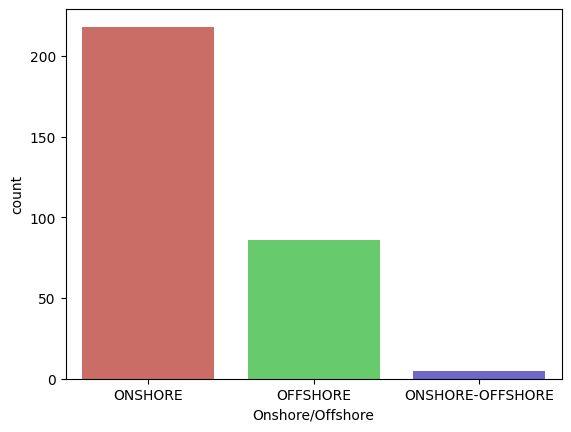

In [ ]:
sns.countplot(x ='Onshore/Offshore', data = df, palette='hls')
plt.show()

In [ ]:
df['Onshore/Offshore'].value_counts()

,count
Onshore/Offshore,
ONSHORE,218
OFFSHORE,86
ONSHORE-OFFSHORE,5


В данном dataframe заметно явное превосходства класса Onshore, его количество почти в 3 раза больше, чем offshore и в 22 раза больше, чем onshore-offshore.

Далее посмотрим детальнее в разделе по обработки признаков.

## Предобработка данных

### Столбец Field name и Reservoir unit

In [ ]:
get_unique_info_series(df,'Field name')
df = df.drop(['Field name', 'Reservoir unit'],axis=1)
# Метод экспериментов пришел к тому, что эти поля мешают определять корректно классы и понижают точность

Количество уникальных значений равно 285
Количество строк с пропусками равно 0


,count
Field name,
ERSKINE,3
ZAKUM,3
LAOJUNMIAO,3
LLOYDMINSTER AREA,2
ELK BASIN,2
POKACHEV,2
GASIKULE,2
CAROLINE,2
BERYL,2


### Столбцы Country, Region, Basin name

In [ ]:
get_unique_info_series(df,'Country'),
# Видим, что есть строки с пропусками, и такие же проблемы есть у столбцов Region, Basin name

Количество уникальных значений равно 42
Количество строк с пропусками равно 27


,count
Country,
USA,80
CANADA,33
UK,22
CHINA,20
RUSSIA,18
NORWAY,11
INDONESIA,10
AUSTRALIA,8
EGYPT,7


(None,)

In [ ]:
# Заполняем значения на моду
df['Country'] = df['Country'].fillna(df['Country'].mode().iloc[0])
df['Region'] = df['Region'].fillna(df['Region'].mode().iloc[0])
df['Basin name'] = df['Basin name'].fillna(df['Country'].mode().iloc[0])

# Проверяем есть ли пустые значения в эти столбцах
display(df[['Country', 'Region', 'Basin name']].isnull().sum())

,0
Country,0
Region,0
Basin name,0


In [ ]:
# Кодируем эти переменные

ordinalTerritorialSign, df[['Country', 'Region', 'Basin name']] = encode_column(df, ['Country', 'Region', 'Basin name'])

,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,27.0,3.0,87.0,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,4.0,4.0,20.0,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,28.0,5.0,81.0,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,38.0,1.0,51.0,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,5.0,6.0,89.0,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


### Столбец Tectonic regime

In [ ]:
get_unique_info_series(df,'Tectonic regime')
# Видно, что здесь список строк. Поэтому сначала распарсим его, а потом уже закодируем

Количество уникальных значений равно 55
Количество строк с пропусками равно 0


,count
Tectonic regime,
COMPRESSION,72
COMPRESSION/EROSION,29
EXTENSION,28
COMPRESSION/EVAPORITE,22
INVERSION/COMPRESSION/EXTENSION,20
EXTENSION/EROSION,13
GRAVITY/EXTENSION/EVAPORITE,10
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION,8
INVERSION/COMPRESSION/EXTENSION/EROSION,7


In [ ]:
df["Tectonic regime"] = df["Tectonic regime"].apply(lambda x: x.split('/'))

mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(df["Tectonic regime"]), columns=mlb.classes_)

df = pd.concat([df, encoded_df], axis=1)
df = df.drop('Tectonic regime', axis=1)

### Столбцы Latitude и Longitude

In [ ]:
get_unique_info_series(df,'Latitude', count=5)
get_unique_info_series(df,'Longitude', count=5)

Количество уникальных значений равно 262
Количество строк с пропусками равно 27


,count
Latitude,
39.7658,3
57.0556,3
34.3856,2
32.1988,2
46.7495,2


Количество уникальных значений равно 260
Количество строк с пропусками равно 30


,count
Longitude,
97.5663,3
2.0694,3
-94.2574,2
-110.0276,2
56.7018,2


In [ ]:
# У этих значений есть пропуски, заменим их пока что на средние.
# В дальнейшем будем смотреть на корреляцию и коэффициенты модели
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

# Проверяем есть ли пропуски
df[['Longitude', 'Latitude']].isnull().sum()

,0
Longitude,0
Latitude,0


### Столбец Operator company

In [ ]:
get_unique_info_series(df,'Operator company')

Количество уникальных значений равно 138
Количество строк с пропусками равно 0


,count
Operator company,
NUMEROUS,28
PETROCHINA,17
CHEVRON,16
BP,12
SHELL,10
EXXONMOBIL,10
CONOCOPHILLIPS,9
STATOILHYDRO,8
PDO,7


In [ ]:
# Кодируем столбец
ordinalEncoderOperatorCompany, df['Operator company'] = encode_column(df, ['Operator company'])

,Country,Region,Basin name,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,...,GRAVITY,INVERSION,LINKED,REACTIVATION,SHALE,STRIKE-SLIP,SYNSEDIMENTATION,TRANSPRESSION,TRANSTENSION,UPLIFT
0,27.0,3.0,87.0,51.0000,44.8042,75.0,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,20.0,-19.6017,-39.8332,88.0,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,...,0,0,0,0,0,0,0,0,0,0
2,28.0,5.0,81.0,26.0800,49.8100,104.0,ONSHORE,OIL,REJUVENATING,FORELAND,...,0,0,0,0,0,0,0,0,0,0
3,38.0,1.0,51.0,61.3833,1.7500,34.0,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,...,0,0,0,0,0,0,0,0,0,0
4,5.0,6.0,89.0,53.2287,-115.8008,77.0,ONSHORE,OIL,UNKNOWN,FORELAND,...,0,0,0,0,0,0,0,0,0,0


### Столбец Hydrocarbon type

In [ ]:
get_unique_info_series(df,'Hydrocarbon type')

Количество уникальных значений равно 4
Количество строк с пропусками равно 0


,count
Hydrocarbon type,
OIL,231
GAS,46
GAS-CONDENSATE,30
CARBON DIOXIDE,2


In [ ]:
# Кодируем столбец через OneHotEncoder, т.к. уникальных значений не так много. Возможно сможет выявить что-то интересное.

oneHotEncoderHydrocarbonType = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoderHydrocarbotType = oneHotEncoderHydrocarbonType.fit_transform(df[['Hydrocarbon type']])

In [ ]:
# Получение названий новых столбцов
encoded_columns = oneHotEncoderHydrocarbonType.get_feature_names_out(['Hydrocarbon type'])

# Преобразование в DataFrame для удобства
encoded_df = pd.DataFrame(encoderHydrocarbotType, columns=encoded_columns)

# Объединение с исходным DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Удаление оригинального столбца
df.drop(columns=['Hydrocarbon type'], inplace=True)

### Столбец Onshore/Offshore (Целевая)

In [ ]:
# Кодируем ее с помощью LabelEncoder и для удобства переносим в конец DataFrame

labelEncoder = LabelEncoder()

df['Onshore/Offshore'] = labelEncoder.fit_transform(df['Onshore/Offshore'])

df['Onshore/Offshore'] = df.pop('Onshore/Offshore')

### Cтолбец Reservoir status

In [ ]:
get_unique_info_series(df,'Reservoir status')

Количество уникальных значений равно 13
Количество строк с пропусками равно 0


,count
Reservoir status,
DECLINING PRODUCTION,88
MATURE PRODUCTION,63
NEARLY DEPLETED,55
PLATEAU PRODUCTION,30
DEVELOPING,22
REJUVENATING,18
UNKNOWN,9
UNDEVELOPED,7
ABANDONED,6


In [ ]:
ordinalEncoderReservoirStatus, df['Reservoir status'] = encode_column(df, ['Reservoir status'])

,Country,Region,Basin name,Latitude,Longitude,Operator company,Reservoir status,Structural setting,Depth,Reservoir period,...,STRIKE-SLIP,SYNSEDIMENTATION,TRANSPRESSION,TRANSTENSION,UPLIFT,Hydrocarbon type_CARBON DIOXIDE,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_OIL,Onshore/Offshore
0,27.0,3.0,87.0,51.0000,44.8042,75.0,2.0,FORELAND,1870,CARBONIFEROUS,...,0,0,0,0,0,0.0,0.0,0.0,1.0,1
1,4.0,4.0,20.0,-19.6017,-39.8332,88.0,6.0,PASSIVE MARGIN,4843,PALEOGENE,...,0,0,0,0,0,0.0,0.0,0.0,1.0,1
2,28.0,5.0,81.0,26.0800,49.8100,104.0,8.0,FORELAND,6050,JURASSIC,...,0,0,0,0,0,0.0,0.0,0.0,1.0,1
3,38.0,1.0,51.0,61.3833,1.7500,34.0,6.0,RIFT,8988,JURASSIC,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0
4,5.0,6.0,89.0,53.2287,-115.8008,77.0,12.0,FORELAND,9306,DEVONIAN,...,0,0,0,0,0,0.0,0.0,0.0,1.0,1


### Столбец Structural setting

In [ ]:
get_unique_info_series(df,'Structural setting')

Количество уникальных значений равно 43
Количество строк с пропусками равно 0


,count
Structural setting,
FORELAND,78
RIFT,46
INTRACRATONIC,33
THRUST,18
PASSIVE MARGIN,13
SALT/FORELAND,13
SALT/PASSIVE MARGIN,10
INVERSION/RIFT,9
INVERSION/BACKARC,8


In [ ]:
# Видно, что данные повторяются и играют роль списка, поэтому распарсим его и закодируем через MLB
df["Structural setting"] = df["Structural setting"].apply(lambda x: x.split('/'))

mlbStructuralSetting = MultiLabelBinarizer()
encoded_df_StructuralSetting = pd.DataFrame(mlbStructuralSetting.fit_transform(df["Structural setting"]), columns=mlbStructuralSetting.classes_)

df = pd.concat([df, encoded_df_StructuralSetting], axis=1)
df = df.drop("Structural setting", axis=1)

### Столбцы Reservoir period и  Lithology

In [ ]:
get_unique_info_series(df,'Reservoir period')
get_unique_info_series(df,'Lithology')

Количество уникальных значений равно 22
Количество строк с пропусками равно 0


,count
Reservoir period,
CRETACEOUS,78
JURASSIC,41
NEOGENE,39
PALEOGENE,37
CARBONIFEROUS,29
PERMIAN,28
DEVONIAN,15
TRIASSIC,8
CRETACEOUS-PALEOGENE,8


Количество уникальных значений равно 13
Количество строк с пропусками равно 0


,count
Lithology,
SANDSTONE,184
DOLOMITE,45
LIMESTONE,38
SHALY SANDSTONE,6
THINLY-BEDDED SANDSTONE,6
CONGLOMERATE,6
CHALK,6
LOW-RESISTIVITY SANDSTONE,6
CHALKY LIMESTONE,5


In [ ]:
ordinalEncoderLithology, df[['Reservoir period',  'Lithology']]  = encode_column(df, ['Reservoir period',  'Lithology'])

,Country,Region,Basin name,Latitude,Longitude,Operator company,Reservoir status,Depth,Reservoir period,Lithology,...,FORELAND,INTRACRATONIC,INVERSION,PASSIVE MARGIN,RIFT,SALT,SUB-SALT,SUB-THRUST,THRUST,WRENCH
0,27.0,3.0,87.0,51.0000,44.8042,75.0,2.0,1870,2.0,7.0,...,1,0,0,0,0,0,0,0,0,0
1,4.0,4.0,20.0,-19.6017,-39.8332,88.0,6.0,4843,14.0,7.0,...,0,0,0,1,0,0,0,0,0,0
2,28.0,5.0,81.0,26.0800,49.8100,104.0,8.0,6050,9.0,5.0,...,1,0,0,0,0,0,0,0,0,0
3,38.0,1.0,51.0,61.3833,1.7500,34.0,6.0,8988,9.0,7.0,...,0,0,0,0,1,0,0,0,0,0
4,5.0,6.0,89.0,53.2287,-115.8008,77.0,12.0,9306,6.0,3.0,...,1,0,0,0,0,0,0,0,0,0


### Масштабирование числовых признаков

In [ ]:
num_features = ['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability'  ]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

Итак, мы предобработали данные,закодировали их и масштабировали. Теперь мы готовы к дальнейшей подготовки данных для обучения моделей

## Предобучение моделей

### Балансировка данных

In [ ]:
# Разделяем признаки и целевую переменную
X = df.drop(columns='Onshore/Offshore')
y = df['Onshore/Offshore']

# Применяем SMOTE (создаст больше примеров для редких классов)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Матрица корреляции

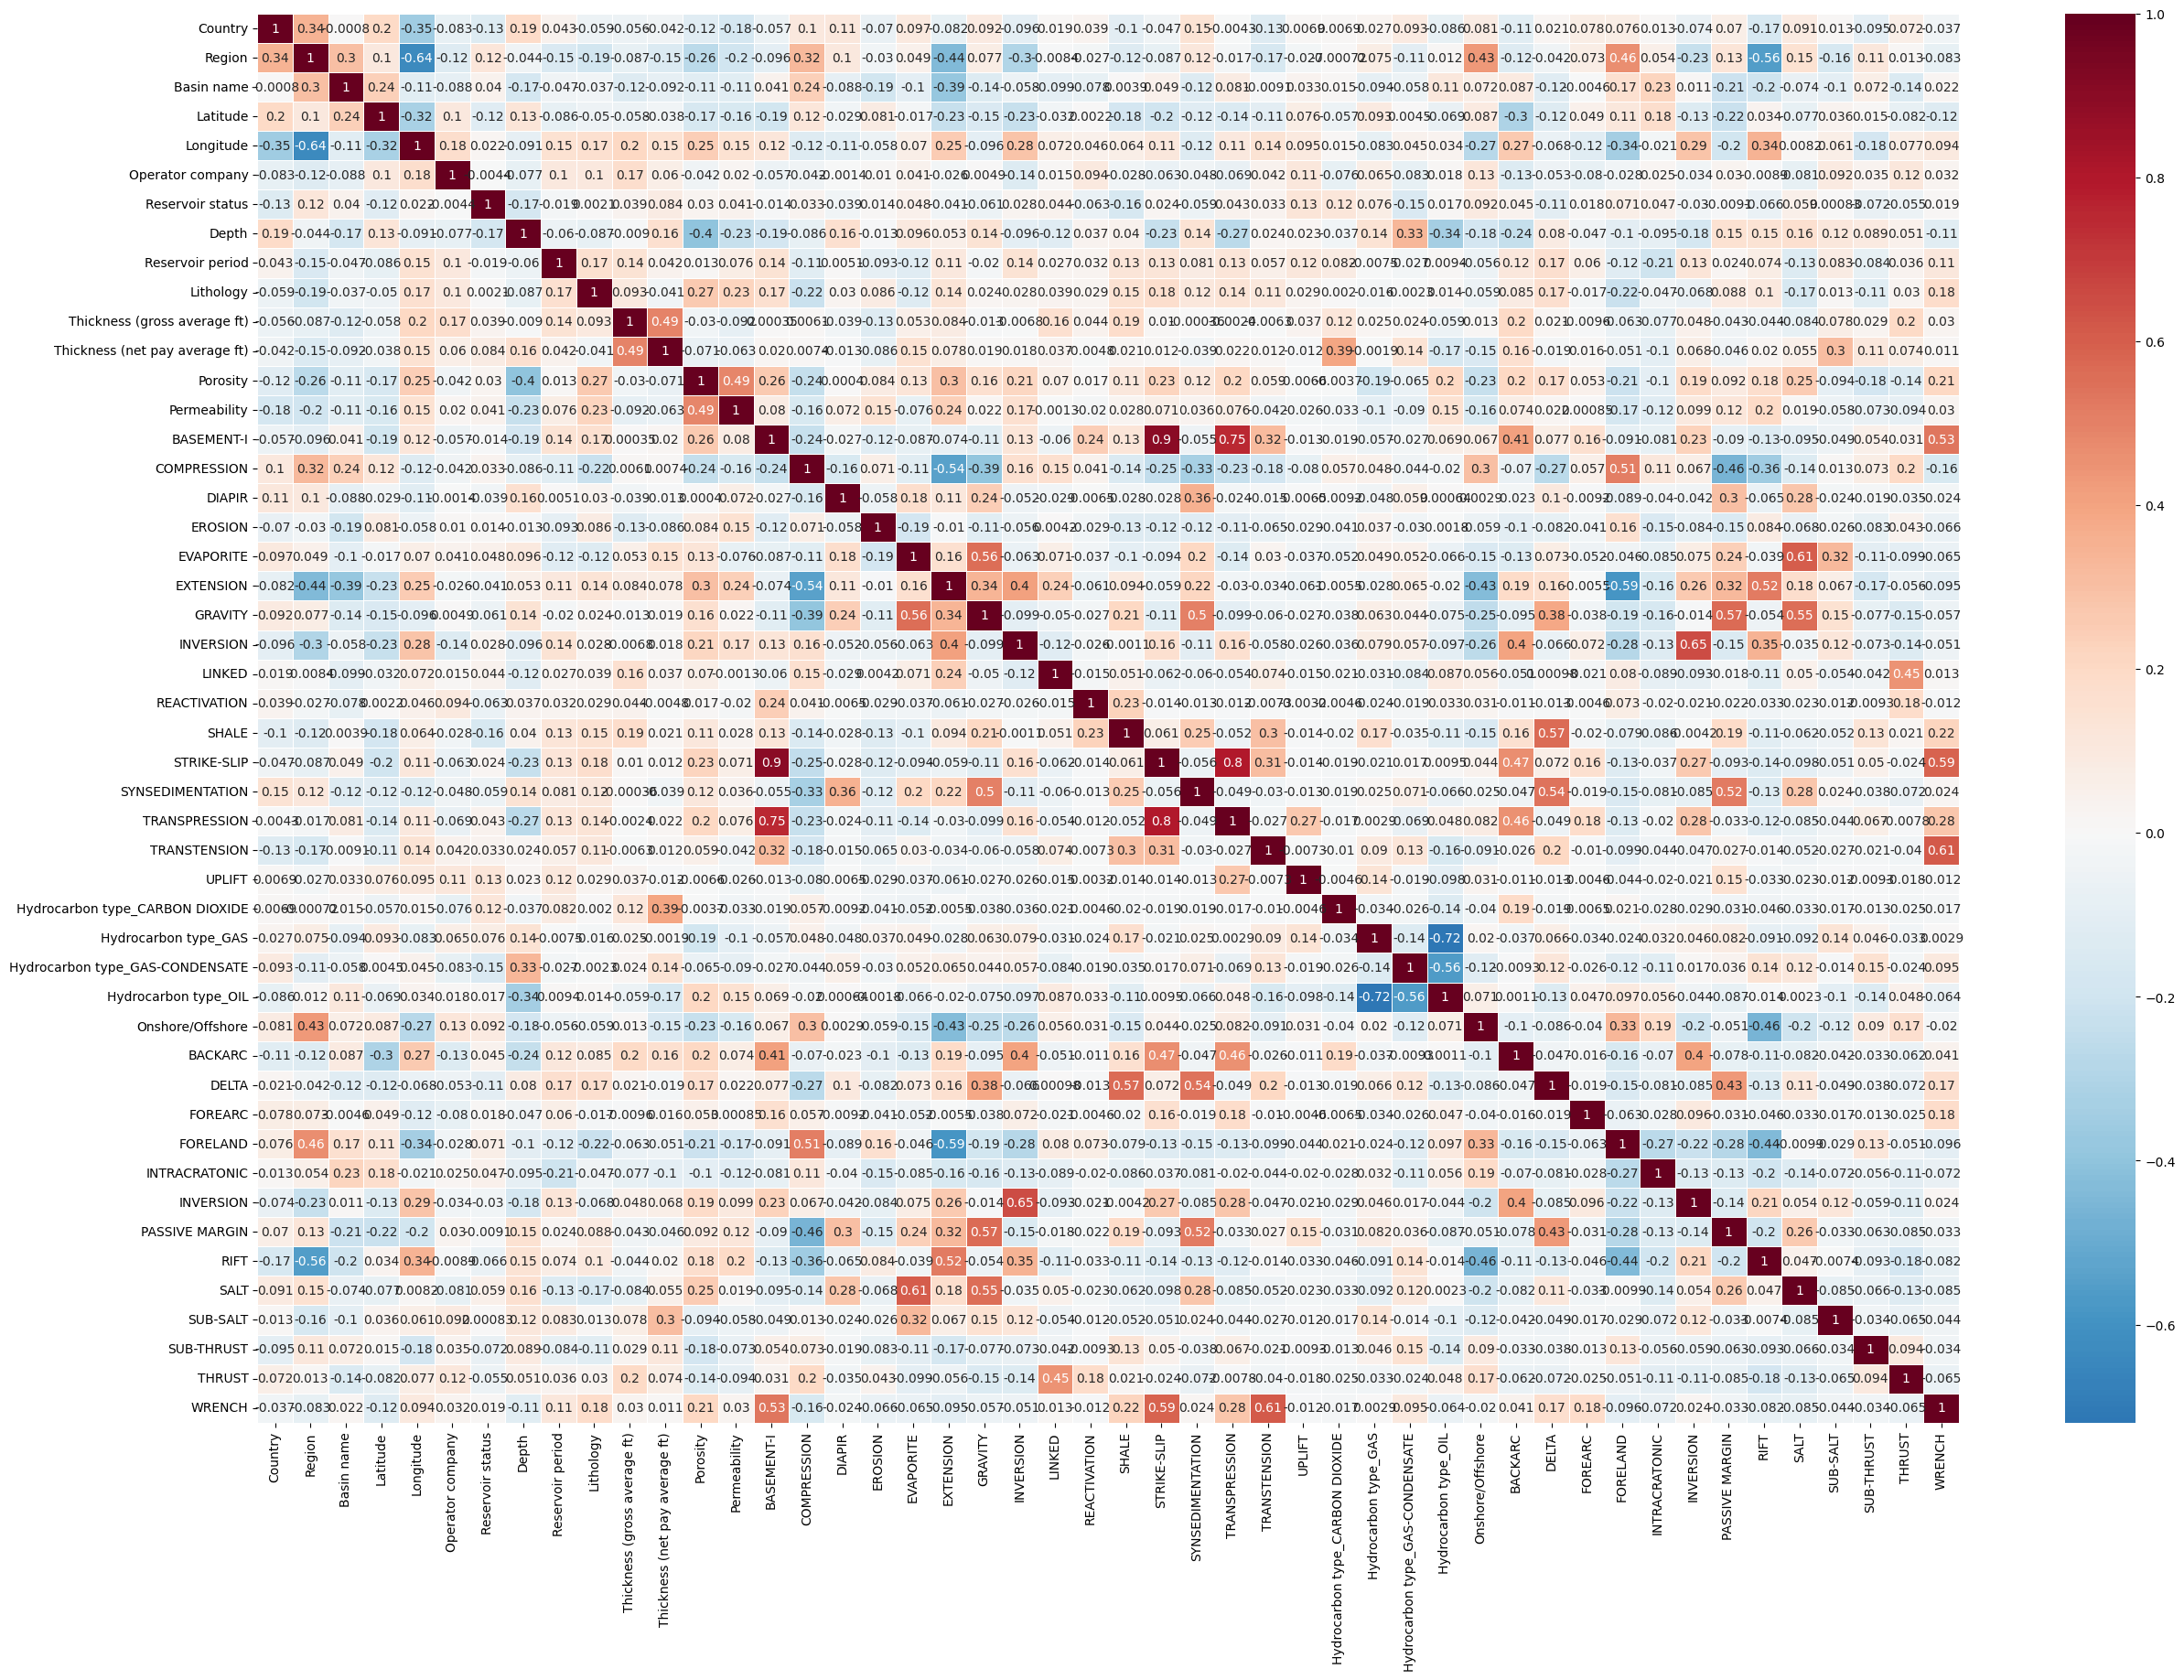

In [ ]:
# Строим корреляционную матрицу факторов + целевой признак.
corr_matrix = df.corr()

# рисуем тепловую карту
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, center=0, linewidths=0.5);

In [ ]:
target_corr = df.corr()['Onshore/Offshore']

# Фильтруем признаки, у которых корреляция с целевой переменной близка к 0
low_corr_features = target_corr[(target_corr > -0.05) & (target_corr < 0.05)]

# Выводим признаки
print("Признаки с корреляцией, близкой к 0 с целевой переменной:")
print(low_corr_features)
# Получили признаки, которые, имеют минимальное влияние на целевую переменную. В дальнейшем посмотрим коэффициенты и возможно уберем эти признаки

Признаки с корреляцией, близкой к 0 с целевой переменной:
Thickness (gross average ft)       0.012884
DIAPIR                             0.002925
REACTIVATION                       0.031434
STRIKE-SLIP                        0.043500
SYNSEDIMENTATION                  -0.024769
UPLIFT                             0.031434
Hydrocarbon type_CARBON DIOXIDE   -0.040404
Hydrocarbon type_GAS               0.020248
FOREARC                           -0.040404
WRENCH                            -0.020092
Name: Onshore/Offshore, dtype: float64


### Разделения данных на обучающую и проверочную

In [ ]:
# Со всеми признаки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
# Без признаков с низкой корреляцией
X_resampled_d = X_resampled.drop(columns=low_corr_features.index)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_resampled_d, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

Отбалансировали классы и разделели выборки два раза. В одной есть удаление признаков с низкой корреляций, в другой нет.

Далее проверим, насколько сильно это влияет на целевую переменную

## Обучение модели KNN

### Подборка гиперпараметров

In [ ]:
# Определяем параметры для поиска без удаления признаков с низкой корреляцией
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


In [ ]:
# Создаем модель KNN
knn = KNeighborsClassifier()

# GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем поиск
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Лучшие параметры: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Лучшая точность: 0.9158974358974359


In [ ]:
# Создаем модель KNN
knn_d = KNeighborsClassifier()

# GridSearchCV с кросс-валидацией
grid_search_d = GridSearchCV(knn_d, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем поиск
grid_search_d.fit(X_train_d, y_train_d)

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search_d.best_params_)
print("Лучшая точность:", grid_search_d.best_score_)

Лучшие параметры: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Лучшая точность: 0.9102014652014653


### Обучение с лучшими признаками

In [ ]:
# Обучение с лучшими признаками
knn_final = KNeighborsClassifier(**grid_search.best_params_)
knn_final.fit(X_train, y_train)
y_pred_knn_final = knn_final.predict(X_test)

knn_accuracy_1 = accuracy_score(y_test, y_pred_knn_final)

print("KNN Accuracy:", knn_accuracy_1)

KNN Accuracy: 0.8931297709923665


In [ ]:
knn_final_d = KNeighborsClassifier(**grid_search_d.best_params_)
knn_final_d.fit(X_train_d, y_train_d)
y_pred_knn_final_d = knn_final_d.predict(X_test_d)

knn_accuracy_2 = accuracy_score(y_test_d, y_pred_knn_final_d)

print("KNN Accuracy:", knn_accuracy_2)

KNN Accuracy: 0.8778625954198473


Удаление столбцов с низкой корреляцией дало небольшой прирост в точности.

Поэтому после подбора гиперпараметров и выяснение, какие самые лучшие. Продолжаем свою работу с knn_final_d


В итоге у нас гиперпараметры:
- 'algorithm': 'auto',
- 'n_neighbors': 3,
- 'p': 1,
- 'weights': 'distance'

## Предсказание на тестовых данных для Kaggle

In [ ]:
df_kaggle = pd.read_csv('/content/classification-of-oil-and-gas-fields/oil_test.csv')
df_kaggle.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [ ]:
df_kaggle.isnull().sum()

,0
Field name,0
Reservoir unit,0
Country,13
Region,16
Basin name,8
Tectonic regime,0
Latitude,1
Longitude,1
Operator company,0
Hydrocarbon type,0


In [ ]:
# Повторяем весь алгоритм по обработки данных на тестовом DF
df_kaggle = df_kaggle.drop(['Field name', 'Reservoir unit'],axis=1)

df_kaggle['Country'] = df_kaggle['Country'].fillna(df_kaggle['Country'].mode().iloc[0])
df_kaggle['Region'] = df_kaggle['Region'].fillna(df_kaggle['Region'].mode().iloc[0])
df_kaggle['Basin name'] = df_kaggle['Basin name'].fillna(df_kaggle['Country'].mode().iloc[0])
df_kaggle[['Country', 'Region', 'Basin name']] = ordinalTerritorialSign.transform(df_kaggle[['Country', 'Region', 'Basin name']])


df_kaggle["Tectonic regime"] = df_kaggle["Tectonic regime"].apply(lambda x: x.split('/'))
encoded_df = pd.DataFrame(mlb.transform(df_kaggle["Tectonic regime"]), columns=mlb.classes_)
df_kaggle = pd.concat([df_kaggle, encoded_df], axis=1)
df_kaggle = df_kaggle.drop('Tectonic regime', axis=1)

df_kaggle['Latitude'] = df_kaggle['Latitude'].fillna(df_kaggle['Latitude'].mean())
df_kaggle['Longitude'] = df_kaggle['Longitude'].fillna(df_kaggle['Longitude'].mean())

df_kaggle['Operator company'] = ordinalEncoderOperatorCompany.transform(df_kaggle[['Operator company']])

encoderHydrocarbotType_test = oneHotEncoderHydrocarbonType.transform(df_kaggle[['Hydrocarbon type']])
encoded_columns_test = oneHotEncoderHydrocarbonType.get_feature_names_out(['Hydrocarbon type'])
encoded_df_test = pd.DataFrame(encoderHydrocarbotType_test, columns=encoded_columns_test)
df_kaggle = pd.concat([df_kaggle, encoded_df_test], axis=1)
df_kaggle.drop(columns=['Hydrocarbon type'], inplace=True)

df_kaggle['Reservoir status'] = ordinalEncoderReservoirStatus.transform(df_kaggle[['Reservoir status']])

df_kaggle["Structural setting"] = df_kaggle["Structural setting"].apply(lambda x: x.split('/'))
encoded_df_StructuralSetting = pd.DataFrame(mlbStructuralSetting.transform(df_kaggle["Structural setting"]), columns=mlbStructuralSetting.classes_)
df_kaggle = pd.concat([df_kaggle, encoded_df_StructuralSetting], axis=1)
df_kaggle = df_kaggle.drop("Structural setting", axis=1)

df_kaggle[['Reservoir period',  'Lithology']] = ordinalEncoderLithology.transform(df_kaggle[['Reservoir period',  'Lithology']])

num_features = ['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability'  ]
df_kaggle[num_features] = scaler.transform(df_kaggle[num_features])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) [''] will be ignored
  warnings.warn(


In [ ]:
df_kaggle_d = df_kaggle.copy()
df_kaggle_d = df_kaggle_d.drop(columns=low_corr_features.index,axis=1)
# y_test_d = knn_final_d.predict(df_kaggle_d)

In [ ]:
# submition_d = pd.DataFrame(y_test_d, columns=['Onshore/Offshore'])
# submition_d = submition_d.reset_index()
# submition_d

In [ ]:
# submition_d.to_csv('my_submit_v5.csv', index=False)
# submition_d['Onshore/Offshore'].value_counts()

In [ ]:
# y_test = knn_final.predict(df_kaggle)
# submition = pd.DataFrame(y_test, columns=['Onshore/Offshore'])
# submition = submition.reset_index()
# submition

In [ ]:
# submition.to_csv('my_submit_v6.csv', index=False)
# submition['Onshore/Offshore'].value_counts()

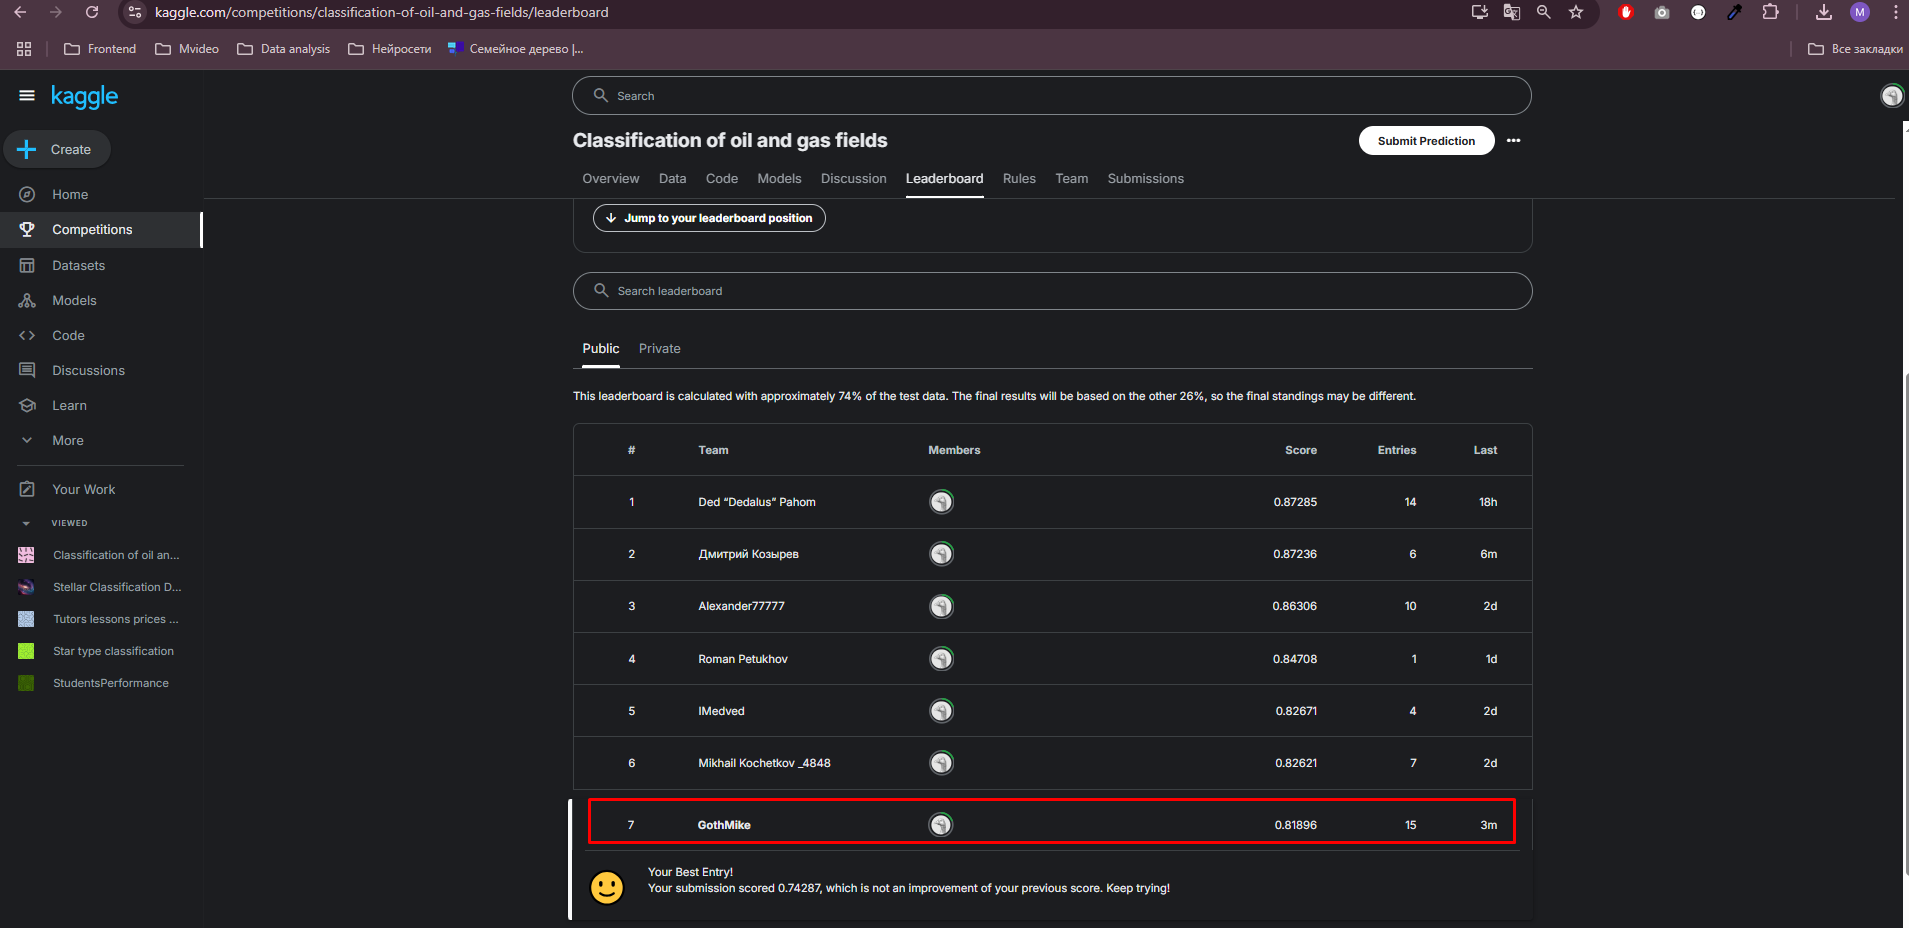

После всех экспериментов, лучшей оказалась модель, которая сохраняет все признаки и находит между ними свзь.

Мой результат 0.81896

In [ ]:
### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [ ]:
# # Определяем параметры для подбора
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Создаем модель
# rf = RandomForestClassifier(random_state=42)

# # Подбор гиперпараметров с кросс-валидацией
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_d, y_train_d)

# # Лучшие параметры и точность
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Создадим DataFrame с результатами
# results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

In [ ]:
# print(best_params)
best_metrics = {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
best_metrics_d = {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# Обучаем Random Forest
rf = RandomForestClassifier(**best_metrics_d)
rf.fit(X_train_d, y_train_d)

# Делаем предсказание
y_pred = rf.predict(df_kaggle_d)

In [ ]:
submition_d = pd.DataFrame(y_pred, columns=['Onshore/Offshore'])
submition_d = submition_d.reset_index()
submition_d

,index,Onshore/Offshore
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
128,128,1
129,129,1
130,130,1
131,131,1


In [ ]:
submition_d.to_csv('my_submit_rf_w.csv', index=False)
submition_d['Onshore/Offshore'].value_counts()

,count
Onshore/Offshore,
1,94
0,38
2,1


In [ ]:
submition_d.to_csv('my_submit_rf_wd.csv', index=False)
submition_d['Onshore/Offshore'].value_counts()